In [11]:
from fplanck import *
import fplanck; importlib.reload(fplanck)

<module 'fplanck' from '/Users/tphillips/multiplicative_noise/python/fplanck.py'>

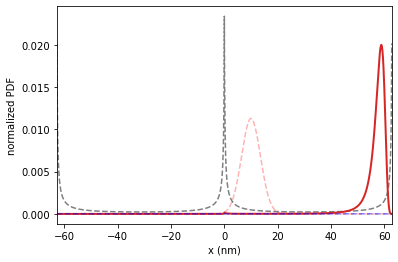

In [ ]:
nm = 1e-9
viscosity = 8e-4
radius = 50*nm
drag_ = 6*np.pi*viscosity*radius

L = 20*nm
F = lambda x: 5e-21/L

xc = 0

def drag(x):
    return drag_*10*(1/(np.abs(np.sin(x/L))+0.01))

sim = fokker_planck(temperature=2, drag=drag, extent=2*np.pi*L,
            resolution=0.1*nm, boundary=boundary.periodic, force=F)

### steady-state solution
steady = sim.steady_state()

### time-evolved solution
pdf = gaussian_pdf(10*nm, 5*nm)
p0 = pdf(sim.grid[0])
Nsteps = 200
time, Pt = sim.propagate_interval(pdf, 2e-3, Nsteps=Nsteps)

### animation
fig, ax = plt.subplots()

ax.plot(sim.grid[0]/nm, steady, color='k', ls='--', alpha=.5)
ax.plot(sim.grid[0]/nm, p0, color='red', ls='--', alpha=.3)
line, = ax.plot(sim.grid[0]/nm, p0, lw=2, color='C3')

def update(i):
    line.set_ydata(Pt[i])
    return [line]

anim = FuncAnimation(fig, update, frames=range(Nsteps), interval=30)
ax.set(xlabel='x (nm)', ylabel='normalized PDF')
ax.margins(x=0)

anim.save('/FPE_16.mp4', writer = 'ffmpeg', fps = 30)

J = sim.probability_current(steady)
ax.plot(sim.grid[0]/nm, 2000*J[0], color='b', ls='--', alpha=.5)